### **IMPORTING LIBRARIES**

In [4]:
# Install Required Libraries
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 req

In [5]:
# Import Necessary Libraries
from transformers import BertForSequenceClassification, BertTokenizer, BertForMaskedLM, Trainer, TrainingArguments
from datasets import load_dataset, load_metric
import numpy as np
import pandas as pd

### **LOADING AND EXPLORING THE DATASET**

In [6]:
# Load and Explore the Dataset
rotten_ds = load_dataset("cornell-movie-review-data/rotten_tomatoes")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [7]:
# Print the data structure
print(rotten_ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})


### **CONVERTING INTO DATAFRAMES**

In [8]:
# Convert the dataset to pandas DataFrames for easier exploration
df_train = pd.DataFrame(rotten_ds["train"])
df_validation = pd.DataFrame(rotten_ds["validation"])
df_test = pd.DataFrame(rotten_ds["test"])

# Print the first few rows of the sets
print("Train set:", df_train.head())
print("Validation set:", df_validation.head())
print("Test set:", df_test.head())

Train set:                                                 text  label
0  the rock is destined to be the 21st century's ...      1
1  the gorgeously elaborate continuation of " the...      1
2                     effective but too-tepid biopic      1
3  if you sometimes like to go to the movies to h...      1
4  emerges as something rare , an issue movie tha...      1
Validation set:                                                 text  label
0  compassionately explores the seemingly irrecon...      1
1  the soundtrack alone is worth the price of adm...      1
2  rodriguez does a splendid job of racial profil...      1
3  beneath the film's obvious determination to sh...      1
4    bielinsky is a filmmaker of impressive talent .      1
Test set:                                                 text  label
0  lovingly photographed in the manner of a golde...      1
1              consistently clever and suspenseful .      1
2  it's like a " big chill " reunion of the baade...      1
3  

### **INSPECTING THE DATA**

In [ ]:
# Print the distribution of labels in the training set
print("\nLabel distribution in the train set:")
print(df_train["label"].value_counts())

# Print the distribution of labels in the validation set
print("\nLabel distribution in the validation set:")
print(df_validation["label"].value_counts())

# Print the distribution of labels in the test set
print("\nLabel distribution in the test set:")
print(df_test["label"].value_counts())


Label distribution in the train set:
label
1    4265
0    4265
Name: count, dtype: int64

Label distribution in the validation set:
label
1    533
0    533
Name: count, dtype: int64

Label distribution in the test set:
label
1    533
0    533
Name: count, dtype: int64


### **PLOTTING THE DATA**

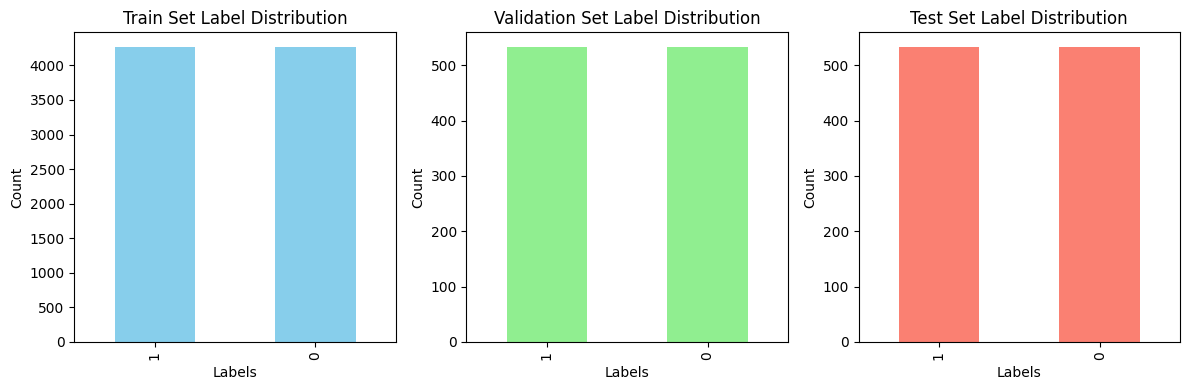

In [9]:
import matplotlib.pyplot as plt
# Plotting the bar graph for all the sets

# Plotting the label distribution for the train set
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df_train["label"].value_counts().plot(kind='bar', color='skyblue')
plt.title("Train Set Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")

# Plotting the label distribution for the validation set
plt.subplot(1, 3, 2)
df_validation["label"].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Validation Set Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")

# Plotting the label distribution for the test set
plt.subplot(1, 3, 3)
df_test["label"].value_counts().plot(kind='bar', color='salmon')
plt.title("Test Set Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [17]:
pos = df_train[df_train['label'] == 1]
neg = df_train[df_train['label'] == 0]

In [19]:
from wordcloud import WordCloud
# Joining text data
text1 = " ".join(title for title in pos.text)

# Generating word cloud
word_cloud1 = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text1)
# saving the image
word_cloud1.to_file('got.png')

In [22]:
from wordcloud import WordCloud
# Joining text data
text1 = " ".join(title for title in neg.text)

# Generating word cloud
word_cloud2 = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text1)
# saving the image
word_cloud2.to_file('got1.png')

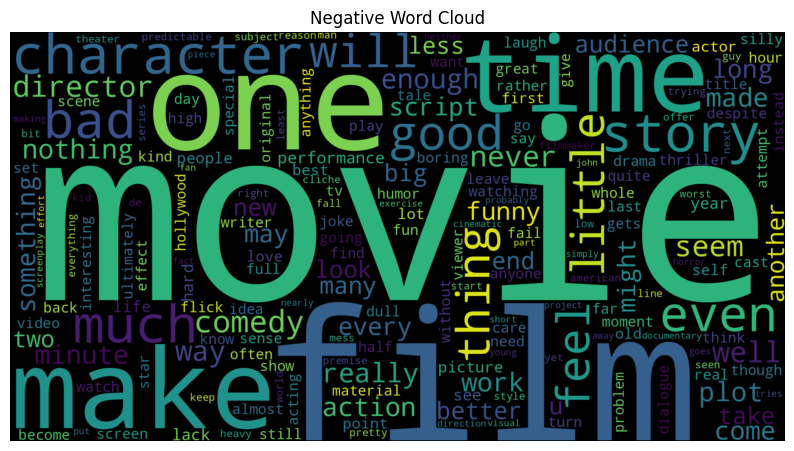

In [23]:
# Display the generated Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.title("Negative Word Cloud")
plt.axis("off")
plt.show()

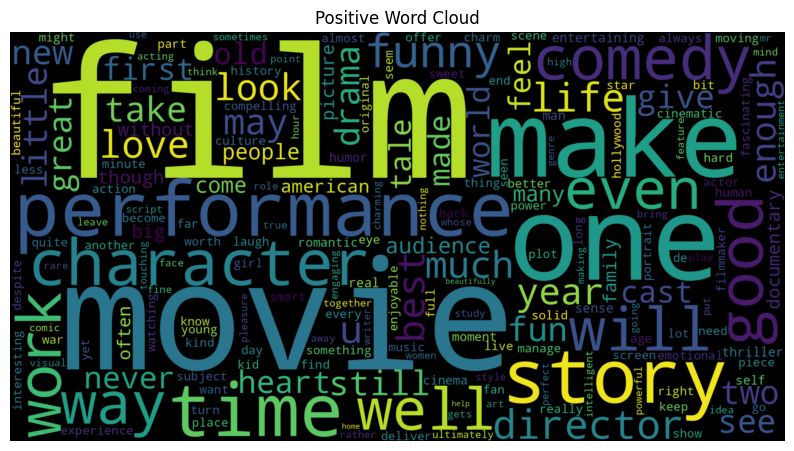

In [21]:
# Display the generated Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.title("Positive Word Cloud")
plt.axis("off")
plt.show()

### **TOKENIZING THE DATASET**

In [ ]:
# Experimenting with BERT Transformer Models
# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Tokenize the dataset
def tokenize_function(example):
    return tokenizer(example['text'], padding='max_length', truncation=True)

tokenized_datasets = rotten_ds.map(tokenize_function, batched=True)

# Rename the label column to labels
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")

# Data collator that handles masking
from transformers import DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15, return_tensors='pt'
)

In [ ]:
# Import and Initialize the DefaultDataCollator
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator(return_tensors='pt')

### **MODEL IMPLEMENTATION**

In [ ]:
# Load the model with two labels for classification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### **TRAINING THE MODEL**



In [ ]:
# Enable gradient checkpointing to reduce memory usage
model.gradient_checkpointing_enable()

# Set up training arguments with reduced batch size and mixed precision
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,

    # Reduce batch size
    per_device_train_batch_size=4,

    # Reduce batch size for evaluation
    per_device_eval_batch_size=4,

    # Enable mixed precision
    fp16=True,

    # Accumulate gradients
    gradient_accumulation_steps=2,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from datasets import load_metric
import numpy as np

# Load the accuracy metric
accuracy_metric = load_metric("accuracy")

# Function to compute accuracy
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    # The BERT model we initialized earlier
    model=model,

    # Training arguments
    args=training_args,

    # Training dataset
    train_dataset=tokenized_datasets['train'],

    # Validation dataset
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,

    # Data collator that handles dynamic padding and masking
    data_collator=data_collator
)

In [ ]:
# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
0,0.541200,0.385931,0.854597
2,0.313700,0.550432,0.863977
4,0.059400,1.049389,0.857411
6,0.000100,1.132881,0.857411
8,0.000000,1.282907,0.855535
9,0.000000,1.303619,0.856473


TrainOutput(global_step=10660, training_loss=0.1081898420657718, metrics={'train_runtime': 2079.0781, 'train_samples_per_second': 41.028, 'train_steps_per_second': 5.127, 'total_flos': 2.243337480210432e+16, 'train_loss': 0.1081898420657718, 'epoch': 9.995311767463667})

### **EVALUATION**

In [ ]:
# Evaluate the model
evaluation_results = trainer.evaluate()
print("Evaluation Results:", evaluation_results)
print(f"Accuracy: {evaluation_results['eval_accuracy']:.4f}")

Evaluation Results: {'eval_loss': 1.3036185503005981, 'eval_accuracy': 0.8564727954971857, 'eval_runtime': 4.983, 'eval_samples_per_second': 213.929, 'eval_steps_per_second': 53.582, 'epoch': 9.995311767463667}
Accuracy: 0.8565


### **PREDICTIONS**

In [ ]:
import torch

# Identify the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the identified device
model.to(device)

# List of sample texts for prediction
sample_texts = [
    "This movie was absolutely fantastic! I loved every moment of it.",
    "I hated this movie. It was a complete waste of time.",
    "The film was okay, but nothing special.",
    "The plot was dull and the acting was terrible.",
    "An excellent movie with a well-crafted storyline and superb performances."
]

# Create a list to hold the predictions
predictions = []

# Iterate over each sample text and make predictions
for sample_text in sample_texts:
    # Tokenize the sample text and move inputs to the same device
    inputs = tokenizer(sample_text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)

    # Make prediction with the fine-tuned model
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation for inference
        outputs = model(**inputs)

    # Extract logits (raw model outputs)
    logits = outputs.logits

    # Convert logits to predictions (0 or 1)
    predicted_class = logits.argmax(dim=-1).item()

    # Map the prediction to human-readable labels
    label_map = {0: "Negative", 1: "Positive"}
    predicted_label = label_map[predicted_class]

    # Add the result to the predictions list
    predictions.append((sample_text, predicted_label))

# Print the arranged predictions
print("Predictions for Sample Texts:\n")
for i, (text, label) in enumerate(predictions, 1):
    print(f"{i}. Text: {text}")
    print(f"   Predicted Sentiment: {label}")
    print("-" * 80)


Predictions for Sample Texts:

1. Text: This movie was absolutely fantastic! I loved every moment of it.
   Predicted Sentiment: Positive
--------------------------------------------------------------------------------
2. Text: I hated this movie. It was a complete waste of time.
   Predicted Sentiment: Negative
--------------------------------------------------------------------------------
3. Text: The film was okay, but nothing special.
   Predicted Sentiment: Negative
--------------------------------------------------------------------------------
4. Text: The plot was dull and the acting was terrible.
   Predicted Sentiment: Negative
--------------------------------------------------------------------------------
5. Text: An excellent movie with a well-crafted storyline and superb performances.
   Predicted Sentiment: Positive
--------------------------------------------------------------------------------
